In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split



In [2]:
data = pd.read_csv('WEC_Sydney_100.csv')
data.sample(10)

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
540,198.00,0.00,197.46,75.07,197.18,149.14,149.00,198.00,398.00,0.0,...,65808.30,67283.29,70321.08,66359.43,79394.49,81141.06,81303.25,72294.55,0.65,6923100.81
2247,598.00,0.00,595.67,78.29,593.70,150.00,478.60,198.00,998.00,0.0,...,56621.43,58942.14,59088.81,58390.60,66421.95,68989.57,70686.40,64354.82,0.66,7020529.20
907,198.00,0.00,197.07,77.44,193.70,150.00,84.98,198.00,398.00,0.0,...,62701.52,65805.72,64715.94,62938.71,82828.39,83557.35,81667.29,72009.64,0.68,7217344.09
54,1.00,0.00,1.00,51.00,1.00,101.00,1.00,151.00,598.00,0.0,...,72284.22,67855.78,70559.79,67969.72,87454.69,84516.73,79181.80,83592.45,0.68,7242571.10
158,198.00,0.00,197.07,77.44,193.70,150.00,84.98,198.00,398.00,0.0,...,62361.09,65849.91,64902.48,62594.33,82559.86,83200.41,81692.40,71915.64,0.68,7184849.63
1147,201.00,1.00,201.00,51.00,201.00,101.00,227.00,188.00,641.00,0.0,...,65762.81,65570.32,64133.29,65664.90,82780.88,82913.32,80463.85,69922.18,0.68,7185407.53
1266,100.00,0.00,250.00,0.00,350.00,0.00,500.00,0.00,700.00,50.0,...,55229.02,56216.11,60513.45,63480.69,66951.58,78500.78,69455.31,84905.40,0.69,7270357.21
99,48.00,1.00,98.00,50.00,148.00,100.00,198.00,150.00,598.00,0.0,...,60490.49,62026.26,64153.21,59899.27,81399.12,81404.19,81081.67,72564.65,0.68,7162324.28
1923,19.37,53.55,267.55,67.89,317.24,61.59,494.83,80.09,645.56,0.0,...,58257.18,57245.30,62632.79,61278.96,62557.15,71928.72,74334.97,84625.03,0.67,7123349.11
56,198.00,0.00,197.18,80.53,193.59,150.00,77.58,198.00,398.00,0.0,...,52903.26,57919.24,62189.74,60348.05,80357.33,81156.51,80050.50,69990.11,0.66,6985110.76


In [3]:
X = data.drop('Total_Power', axis=1)
y = data['Total_Power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [4]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth=None, max_features=None)
model.fit(X_train, y_train)

#random_state=42, min_samples_split=2,splitter='best'

DecisionTreeRegressor()

In [5]:
y_pred = model.predict(X_test)
y_pred

array([7178136.94, 7207700.11, 7234606.41, 7250240.33, 7234646.34,
       7285129.85, 7235657.47, 7221388.61, 7285989.82, 7251095.69,
       7176608.61, 7276371.11, 7176971.83, 7255977.16, 6971074.14,
       7121221.94, 7142644.95, 7217344.09, 6909459.23, 7143725.83,
       7165788.56, 7142644.95, 7228326.3 , 7076742.45, 7098837.11,
       7184849.63, 7263504.94, 7089268.23, 7270519.41, 7068483.12,
       7221609.79, 7120947.8 , 7258766.2 , 7173020.01, 7121262.11,
       7285989.82, 7230923.61, 7228326.3 , 7060303.12, 7240286.34,
       7183482.85, 7215804.98, 7076742.45, 7182444.77, 7175802.79,
       7225508.55, 7162933.33, 7003166.03, 7258037.92, 7137474.57,
       7134122.2 , 7227425.45, 7215409.01, 7231756.31, 7154315.97,
       7234646.34, 7182444.77, 7258766.2 , 6979885.85, 7273423.64,
       7098960.96, 7227849.61, 7231756.31, 7255804.23, 7057549.48,
       7085782.62, 7149866.79, 7105855.13, 7247640.01, 7273423.64,
       7126065.74, 7008496.23, 7114761.75, 7238618.4 , 6980126

In [6]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("The mean absolute error is:", mae) 
print("The mean squared error",mse)

The mean absolute error is: 10819.703965517583
The mean squared error 509217538.885384


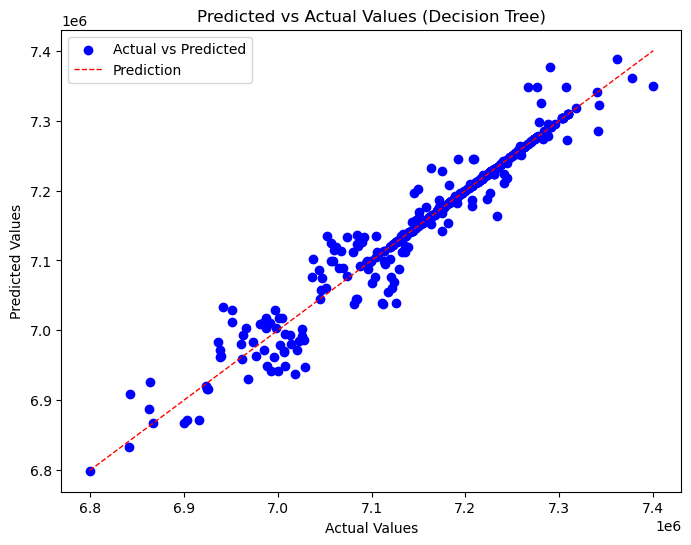

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=1, label='Prediction')
plt.title('Predicted vs Actual Values (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()